<a href="https://colab.research.google.com/github/pixelcode009/-Mymlprojects/blob/master/Mini_Projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cardioActivities.csv to cardioActivities (1).csv


## **TASK-1**
Take an in-depth analytical look at my training. Its time to analyze running data to see how is performance import the data and start exploring to find potential problems. After that, create data cleaning strategies to fix the issues. Finally, analyze and visualize the clean time-series data. data has seven years worth of training data, from 2012 through 2018. The data is a CSV file where each row is a single training activity. Let's load and inspect it.

In [ ]:
#apart from .upload method from google colab, we can also use:

import pandas as pd
rf=pd.read_csv('cardioActivities.csv')
rf.head()


,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friends Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


In [ ]:
rf.info()

## **TASK-2**
Lucky for us, the column names Runkeeper provides are informative, and we don't need to rename any columns.


But, we do notice missing values using the info() method. What are the reasons for these missing values? It depends. Some heart rate information is missing because I didn't always use a cardio sensor. In the case of the Notes column, it is an optional field that I sometimes left blank. Also, I only used the Route Name column once, and never used the Friend's Tagged column.


We'll fill in missing values in the heart rate column to avoid misleading results later, but right now, our first data preprocessing steps will be to:

Remove columns not useful for our analysis.
Replace the "Other" activity type to "Unicycling" because that was always the "Other" activity.
Count missing values.



"""columns to be deleted:
1.**route**:this column has no information related
2.**Friends Tagged**: this column has no information
3.**Notes**: Unambiguous information not required for further analysis"""

In [ ]:
rf.drop(columns=['Route Name',"Friends Tagged",'Notes'])

,Date,Activity Id,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,10.44,58:40,5:37,10.68,774.0,130,159.0,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,12.84,1:14:12,5:47,10.39,954.0,168,159.0,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,13.01,1:15:16,5:47,10.37,967.0,171,155.0,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,12.98,1:14:25,5:44,10.47,960.0,169,158.0,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,13.02,1:12:50,5:36,10.73,967.0,170,154.0,2018-10-27-170136.gpx
...,...,...,...,...,...,...,...,...,...,...,...
503,2012-08-28 07:06:57,f5218490-a372-44c8-bb20-de3b91984cbe,Walking,1.57,13:39,8:41,6.91,926743.0,7,NaN,2012-08-28-070657.gpx
504,2012-08-24 12:59:42,018f66a7-da5e-4985-a8fe-725a33317c87,Walking,1.48,17:56,12:09,4.94,942192.0,12,NaN,2012-08-24-125942.gpx
505,2012-08-24 10:12:16,7acec95a-d63d-435d-837c-7befb352f500,Walking,1.49,13:43,9:14,6.49,924486.0,9,NaN,2012-08-24-101216.gpx
506,2012-08-24 08:13:12,f790bdb2-b921-4018-bd39-d59d870c5847,Running,3.15,16:00,5:05,11.82,2288868.0,17,NaN,2012-08-24-081312.gpx


In [ ]:
a=rf.Type.value_counts()['Running']
b=rf.Type.value_counts()['Walking']
c=rf.Type.value_counts()['Cycling']
d=rf.Type.value_counts()['Other']
print("Running:%s \nWalking: %s \nCycling:%s \nOther:%s"%(a,b,c,d))




Running:459 
Walking: 18 
Cycling:29 
Other:2


In [ ]:
rf['Type']=rf['Type'].replace("Other","Unicycling")

In [ ]:
a1=rf['Type'].isnull().sum()
b1=rf['Distance (km)'].isnull().sum()
c1=rf['Duration'].isnull().sum()
d1=rf['Average Pace'].isnull().sum()
e1=rf['Average Speed (km/h)'].isnull().sum()
f1=rf['Climb (m)'].isnull().sum()
g1=rf['Average Heart Rate (bpm)'].isnull().sum()
print("Type:%s \nDistance (km):%s \nDuration:%s \nAverage Pace:%s \nAverage Speed (km/h):%s \nClimb(m):%s \nAverage Heart Rate(bpm):%s"%(a1,b1,c1,d1,e1,f1,g1))








Type:0 
Distance (km):0 
Duration:0 
Average Pace:0 
Average Speed (km/h):0 
Climb(m):0 
Average Heart Rate(bpm):214


## **TASK-3**
As we can see from the last output, there are 214 missing entries for my average heart rate.
We can't go back in time to get those data, but we can fill in the missing values with an average value. This process is called mean imputation. When imputing the mean to fill in missing data, we need to consider that the average heart rate varies for different activities (e.g., walking vs. running). We'll filter the DataFrames by activity type (Type) and calculate each activity's mean heart rate, then fill in the missing values with those means.


As we are seeing the null values are observed in Average Heart Rate.So, to solve this:
Splitting up the data set according to the activities:


In [ ]:
# Calculate sample means for heart rate for each training activity type 

# Split whole DataFrame into several, specific for different activities

# Filling missing values with counted means  

# Count missing values for each column in running data


In [ ]:
run_df=rf[rf.Type=='Running']
walk_df=rf[rf.Type=='Walking']
cyc_df=rf[rf.Type=='Cycling']
uni_df=rf[rf.Type=='Unicycling']

Individual Average heart rate mean from each  activity dataset :

In [ ]:
avg_run_hr=run_df["Average Heart Rate (bpm)"].mean()
print(avg_run_hr)

144.985559566787


In [ ]:
avg_walk_hr=walk_df["Average Heart Rate (bpm)"].mean()
print(avg_walk_hr)

nan


In [ ]:
avg_cyc_hr=cyc_df["Average Heart Rate (bpm)"].mean()
print(avg_cyc_hr)

124.4


In [ ]:
avg_uni_hr=uni_df["Average Heart Rate (bpm)"].mean()
print(avg_uni_hr)

85.5


Mean of all three data set's Average Heart rate so a to fill up the null spaces with the average of all heart rate observed in all activites.
This process is called **Mean Imputation**.
This will help to fill up the null spaces observed in Average Heart Rate. 

In [ ]:
run_df['Average Heart Rate (bpm)'].fillna(avg_run_hr,inplace=True)
x1=run_df['Average Heart Rate (bpm)'].isnull().sum()
h1=run_df['Average Heart Rate (bpm)'].mean()
x1

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

In [ ]:
walk_df['Average Heart Rate (bpm)'].fillna(115,inplace=True)
x2=walk_df['Average Heart Rate (bpm)'].isnull().sum()
h2=walk_df['Average Heart Rate (bpm)'].mean()
x2

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

In [ ]:
cyc_df['Average Heart Rate (bpm)'].fillna(avg_cyc_hr,inplace=True)
x3=cyc_df['Average Heart Rate (bpm)'].isnull().sum()
h3=cyc_df['Average Heart Rate (bpm)'].mean()

x3


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

In [ ]:
uni_df['Average Heart Rate (bpm)'].fillna(avg_uni_hr,inplace=True)
x4=uni_df['Average Heart Rate (bpm)'].isnull().sum()
h4=uni_df['Average Heart Rate (bpm)'].mean()

x4


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

We filled up all the null spaces with the average of the data in average Heart Rate.


In [ ]:
frame=[run_df,walk_df,cyc_df,uni_df] #concatenated all the frames
all_df=pd.concat(frame)
all_df.drop(columns=['Route Name',"Friends Tagged",'Notes'])


,Date,Activity Id,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,10.44,58:40,5:37,10.68,774.0,130,159.0,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,12.84,1:14:12,5:47,10.39,954.0,168,159.0,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,13.01,1:15:16,5:47,10.37,967.0,171,155.0,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,12.98,1:14:25,5:44,10.47,960.0,169,158.0,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,13.02,1:12:50,5:36,10.73,967.0,170,154.0,2018-10-27-170136.gpx
...,...,...,...,...,...,...,...,...,...,...,...
447,2013-05-09 17:24:19,b22dfd09-a8df-4796-86e4-e4d00ca151f6,Cycling,15.47,38:08,2:28,24.33,339.0,88,124.4,2013-05-09-172419.gpx
449,2013-05-05 14:26:37,4370c545-ff6f-4829-967d-b0dbd0b54798,Cycling,20.30,1:06:29,3:17,18.31,498.0,97,124.4,2013-05-05-142637.gpx
456,2013-04-28 17:26:52,ea228333-1dc2-4798-90e6-d4b7aa93545c,Cycling,13.87,48:27,3:30,17.17,341.0,133,124.4,2013-04-28-172652.gpx
11,2018-09-02 17:24:28,51781e97-560e-48d0-9522-44f303f9235f,Unicycling,17.65,1:01:28,3:29,17.23,1164.0,219,77.0,2018-09-02-172428.gpx


In [ ]:
a1=all_df['Type'].isnull().sum()
b1=all_df['Distance (km)'].isnull().sum()
c1=all_df['Duration'].isnull().sum()
d1=all_df['Average Pace'].isnull().sum()
e1=all_df['Average Speed (km/h)'].isnull().sum()
f1=all_df['Climb (m)'].isnull().sum()
g1=all_df['Average Heart Rate (bpm)'].isnull().sum()
print("Type:%s \nDistance (km):%s \nDuration:%s \nAverage Pace:%s \nAverage Speed (km/h):%s \nClimb(m):%s \nAverage Heart Rate(bpm):%s"%(a1,b1,c1,d1,e1,f1,g1))

Type:0 
Distance (km):0 
Duration:0 
Average Pace:0 
Average Speed (km/h):0 
Climb(m):0 
Average Heart Rate(bpm):0


Hence, We can see there is no null values left.Lets move to another one.

## **TASK-4**
Now we can create our first plot! As we found earlier, most of the activities in data were running (459 of them to be exact). There are only 29, 18, and two instances for cycling, walking, and unicycling, respectively. So for now, let's focus on plotting the different running metrics. An excellent first visualization is a figure with four subplots, one for each running metric (each numerical column). Each subplot will have a different y-axis, which is explained in each legend. The x-axis, Date, is shared among all subplots


In [ ]:
# Import matplotlib, set style and ignore warning


# Prepare data subsetting period from 2013 till 2018

# Create, plot and customize in one step


# Show plot




I splitted up date and time from the date column to ease the retrieval.

In [ ]:
new=run_df["Date"].str.split(" ", n = 1, expand = True)  #splitting up date and time
run_df["date"]=new[0]
run_df["time"]=new[1]
run_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friends Tagged,Notes,GPX File,date,time
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.00000,NaN,NaN,2018-11-11-140512.gpx,2018-11-11,14:05:12
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.00000,NaN,NaN,2018-11-09-150235.gpx,2018-11-09,15:02:35
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.00000,NaN,NaN,2018-11-04-160500.gpx,2018-11-04,16:05:00
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.00000,NaN,NaN,2018-11-01-140358.gpx,2018-11-01,14:03:58
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.00000,NaN,NaN,2018-10-27-170136.gpx,2018-10-27,17:01:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2012-09-08 08:35:02,730f5507-59cc-43e6-b696-387f0946c57e,Running,NaN,3.27,15:55,4:52,12.32,231.0,15,144.98556,NaN,NaN,2012-09-08-083502.gpx,2012-09-08,08:35:02
495,2012-09-04 19:12:17,9a6868f1-a41c-435e-9775-d7a803aa61ad,Running,NaN,6.26,32:35,5:12,11.53,455.0,34,144.98556,NaN,NaN,2012-09-04-191217.gpx,2012-09-04,19:12:17
498,2012-09-02 08:41:31,4a9e2e1b-3a98-4630-8a89-3632aea5559a,Running,NaN,3.14,16:16,5:11,11.56,230.0,18,144.98556,NaN,NaN,2012-09-02-084131.gpx,2012-09-02,08:41:31
506,2012-08-24 08:13:12,f790bdb2-b921-4018-bd39-d59d870c5847,Running,NaN,3.15,16:00,5:05,11.82,2288868.0,17,144.98556,NaN,NaN,2012-08-24-081312.gpx,2012-08-24,08:13:12


In [ ]:
new1=run_df["date"].str.split("-", n = 1, expand = True) #splitting year from date to retrieve information with year 2015-2018 accordingly
run_df["Year"]=new1[0]
run_df


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friends Tagged,Notes,GPX File,date,time,Year
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.00000,NaN,NaN,2018-11-11-140512.gpx,2018-11-11,14:05:12,2018
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.00000,NaN,NaN,2018-11-09-150235.gpx,2018-11-09,15:02:35,2018
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.00000,NaN,NaN,2018-11-04-160500.gpx,2018-11-04,16:05:00,2018
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.00000,NaN,NaN,2018-11-01-140358.gpx,2018-11-01,14:03:58,2018
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.00000,NaN,NaN,2018-10-27-170136.gpx,2018-10-27,17:01:36,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2012-09-08 08:35:02,730f5507-59cc-43e6-b696-387f0946c57e,Running,NaN,3.27,15:55,4:52,12.32,231.0,15,144.98556,NaN,NaN,2012-09-08-083502.gpx,2012-09-08,08:35:02,2012
495,2012-09-04 19:12:17,9a6868f1-a41c-435e-9775-d7a803aa61ad,Running,NaN,6.26,32:35,5:12,11.53,455.0,34,144.98556,NaN,NaN,2012-09-04-191217.gpx,2012-09-04,19:12:17,2012
498,2012-09-02 08:41:31,4a9e2e1b-3a98-4630-8a89-3632aea5559a,Running,NaN,3.14,16:16,5:11,11.56,230.0,18,144.98556,NaN,NaN,2012-09-02-084131.gpx,2012-09-02,08:41:31,2012
506,2012-08-24 08:13:12,f790bdb2-b921-4018-bd39-d59d870c5847,Running,NaN,3.15,16:00,5:05,11.82,2288868.0,17,144.98556,NaN,NaN,2012-08-24-081312.gpx,2012-08-24,08:13:12,2012


In [ ]:
y15=run_df[run_df.Year=='2015']
y16=run_df[run_df.Year=='2016']
y17=run_df[run_df.Year=='2017']
y18=run_df[run_df.Year=='2018']

#subdatasets of year 15,16,17,18


In [ ]:
yearframe=[y15,y16,y17,y18]
year4=pd.concat(yearframe)
del year4['Friends Tagged'] #dataset consisting of details from 2015 till 2018

Subplots for all numerical data wrt date


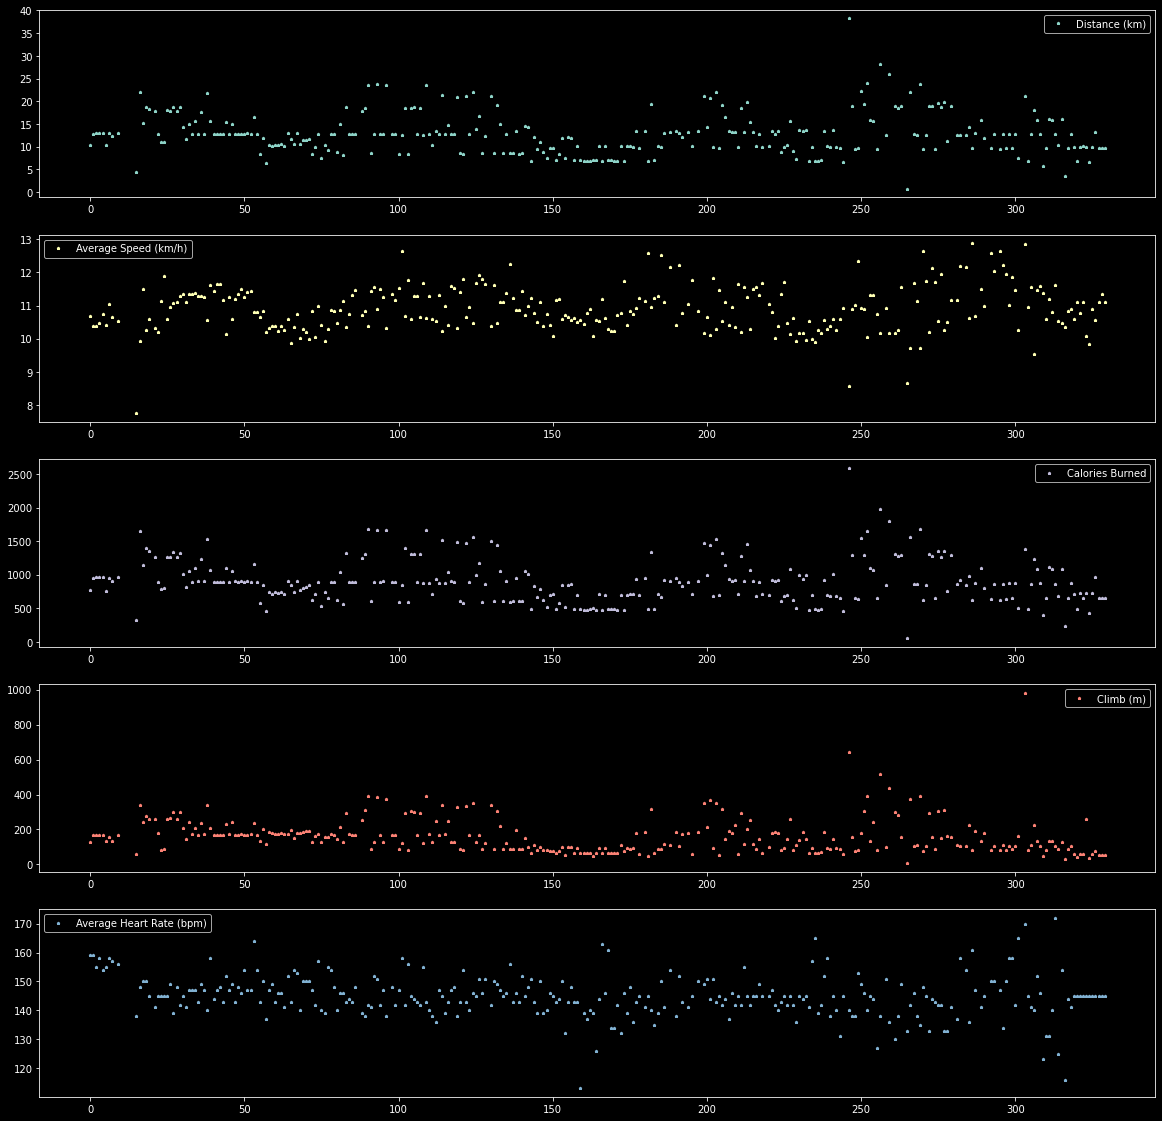

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('dark_background')

year4.plot(subplots=True,sharex=False,figsize=(20,20),linestyle='none',marker='*',markersize=3,)
plt.show()


## **TASK-5**
You'll know you're with a group of runners if you commonly hear questions like:
What is your average distance? How fast do you run? Do you measure your heart rate? How often do you train?
Let's find the answers to these questions in data. If you look back at plots in Task 4, you can see the answer to,Do you measure your heart rate? Before 2015: no. To look at the averages, let's only use the data from 2015 through 2018. In pandas, the resample() method is similar to the groupby() method - with resample()you group by a specific time span. We'll use resample() to group the time series data by a sampling period and apply several methods to each sampling period. In our case, we'll resample annually and weekly.



In [ ]:
# Prepare running data for the last 4 years
# Calculate annual statistics

# Calculate weekly statistics

# Mean weekly counts




In [ ]:
year4.to_csv("file1.csv")

In [ ]:
aframe=pd.read_csv("file1.csv",parse_dates=["Date"],index_col="Date")

In [ ]:
aa=aframe['2015-12-27'].resample('A').mean()  #resampling the data annually(2015)
aa

,Unnamed: 0,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Year
Date,,,,,,,
2015-12-31,238,13.53,10.57,921.999999,185,152.0,2015


In [ ]:
ab=aframe['2016-12-26'].resample('A').mean()  #resampling the data annually(2016)
ab

,Unnamed: 0,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Year
Date,,,,,,,
2016-12-31,160,6.92,10.45,479.0,67,139.0,2016


In [ ]:
ac=aframe['2017-12-27'].resample('A').mean()   #resampling the data annually(2017)
ac

,Unnamed: 0,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Year
Date,,,,,,,
2017-12-31,72,8.29,10.83,622.0,131,147.0,2017


In [ ]:
ad=aframe['2018-11-11'].resample('A').mean()   #resampling the data annually(2018)
ad

,Unnamed: 0,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Year
Date,,,,,,,
2018-12-31,0,10.44,10.68,774.0,130,159.0,2018


In [ ]:
ax=[aa,ab,ac,ad]
awhole=pd.concat(ax) 
awhole[['Distance (km)','Average Speed (km/h)','Climb (m)','Average Heart Rate (bpm)']]

,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.53,10.57,185,152.0
2016-12-31,6.92,10.45,67,139.0
2017-12-31,8.29,10.83,131,147.0
2018-12-31,10.44,10.68,130,159.0


In [ ]:
ba=aframe['2015-09-07'].resample('W').mean()   #resampling the data weekly(2015)
ba[['Distance (km)','Average Speed (km/h)','Climb (m)','Average Heart Rate (bpm)']]

,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-09-13,15.62,11.32,241,144.0


In [ ]:
bb=aframe['2016-09-08'].resample('W-MON').mean()  #resampling the data weekly(2016)
bb[['Distance (km)','Average Speed (km/h)','Climb (m)','Average Heart Rate (bpm)']]

,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2016-09-12,13.12,12.17,110,154.0


In [ ]:
bc=aframe['2017-09-07'].resample('W').mean()  #resampling the data weekly(2017)


bc[['Distance (km)','Average Speed (km/h)','Climb (m)','Average Heart Rate (bpm)']]

,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2017-09-10,8.5,11.45,88,141.0


In [ ]:
bd=aframe['2018-09-30'].resample('W').mean()  #resampling the data weekly(2018)

bd[['Distance (km)','Average Speed (km/h)','Climb (m)','Average Heart Rate (bpm)']]


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2018-09-30,12.97,10.52,171,156.0


# **Weekly average of all 4years:**

In [ ]:
weekwhole=pd.concat([ba,bb,bc,bd])
f1=weekwhole[['Distance (km)','Average Speed (km/h)','Climb (m)','Average Heart Rate (bpm)']].resample('W').interpolate()[::7].mean()
f1

Distance (km)                11.676539
Average Speed (km/h)         11.255187
Climb (m)                   154.154629
Average Heart Rate (bpm)    144.453671
dtype: float64

## **TASK-6**
Let's plot the long term averages of distance run and heart rate with their raw data to visually compare the averages to each training session. Again, we'll use the data from 2015 through 2018. In this task, we will use matplotlib functionality for plot creation and customization.


In [ ]:
# Prepare data

# Create plot


# Plot and customize first subplot

# Plot and customize second subplot

# Show plot


In [ ]:
q1=aframe["2015-06-01":"2015-12-27"]
q1

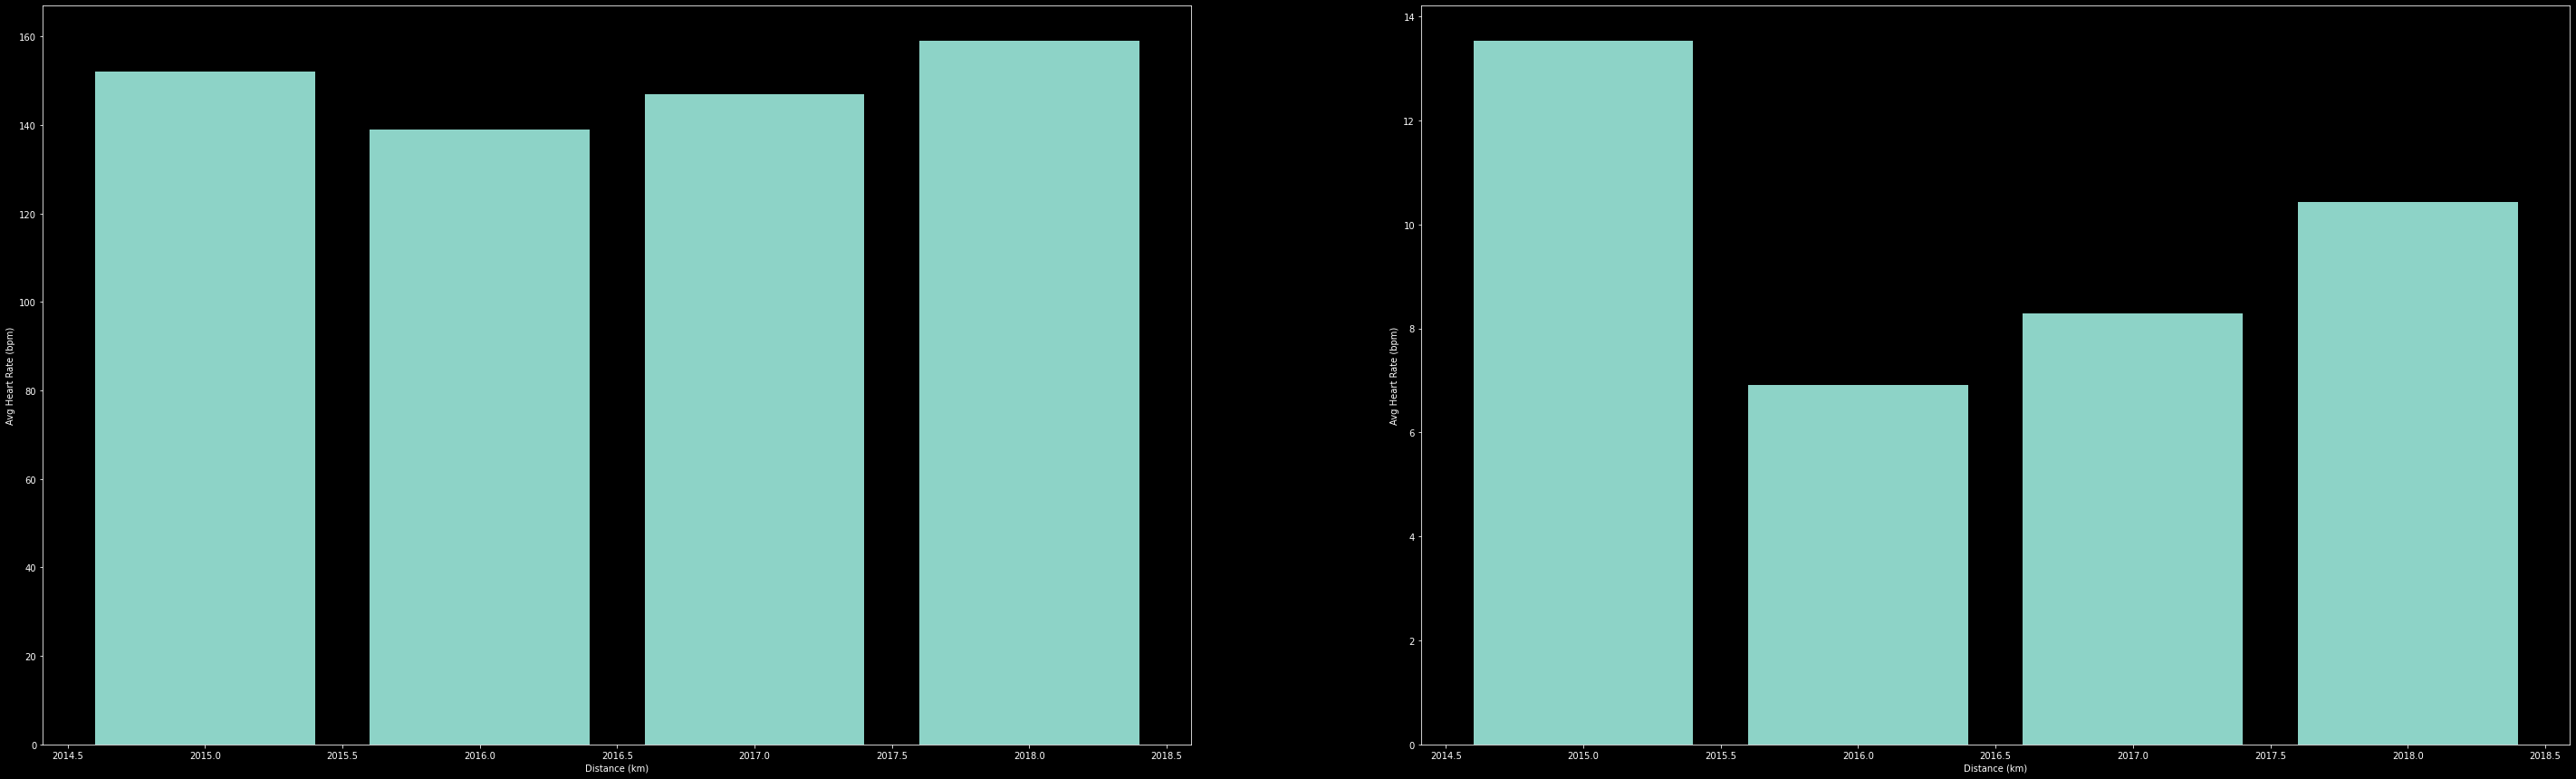

In [ ]:
fig,a1=plt.subplots(1,2,figsize=(50,15))
a1[0].bar(awhole['Year'],awhole['Average Heart Rate (bpm)'])
a1[0].set( xlabel = "Distance (km)",ylabel = "Avg Heart Rate (bpm)")

a1[1].bar(awhole['Year'],awhole['Distance (km)'])
a1[1].set( xlabel = "Distance (km)",ylabel = "Avg Heart Rate (bpm)")



plt.show()

## **TASK-7**
Let's dive a little deeper into the data to answer a tricky question: is person progressing in terms of his running skills? To answer this question, we'll decompose weekly distance run and visually compare it to the raw data. A red trend line will represent the weekly distance run. We are going to use statsmodels library to decompose the weekly trend.



look for stats model decompose method to deal with time series data


In [ ]:
# Import required library


# Prepare data

# Create plot


# Plot and customize


# Show plot




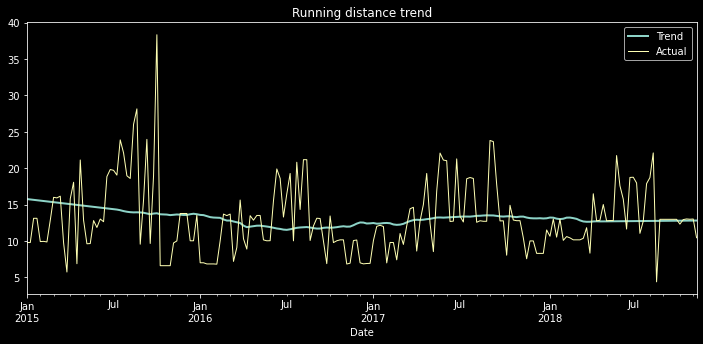

In [ ]:
import statsmodels.api as sm


df_run_dist_wkly = aframe.loc['2013-01-01':'2019-01-01']['Distance (km)'].resample('W').bfill()
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1, freq=52)

fig = plt.figure(figsize=(12,5))

#Showing trends and observed plots
ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Actual', linewidth=1)

ax.legend()
ax.set_title('Running distance trend')


plt.show()


## **TASK-8**
Heart rate is a popular metric used to measure training intensity. Depending on age and fitness level, heart rates are grouped into different zones that people can target depending on training goals. A target heart rate during moderate-intensity activities is about 50-70% of maximum heart rate, while during vigorous physical activity it’s about 70-85% of maximum. We'll create a distribution plot of heart rate data by training intensity. It will be a visual presentation for the number of activities from predefined training zones


In [ ]:
# Prepare data

# Create plot


# Plot and customize




In [ ]:
run_df=rf[rf.Type=='Running']
walk_df=rf[rf.Type=='Walking']
cyc_df=rf[rf.Type=='Cycling']
uni_df=rf[rf.Type=='Unicycling']


In [ ]:
h1 # mean of average heart rate of running activity

In [ ]:
h2  # mean of average heart rate of walking activity

In [ ]:
h3  # mean of average heart rate of cycling activity

In [ ]:
h4  # mean of average heart rate of unicycling activity

In [ ]:
bin_edges=[h1,h2,h3,h4]
hist=["Running","Walking","Cycling","Unicycling"]



## Normal Distribution Plot

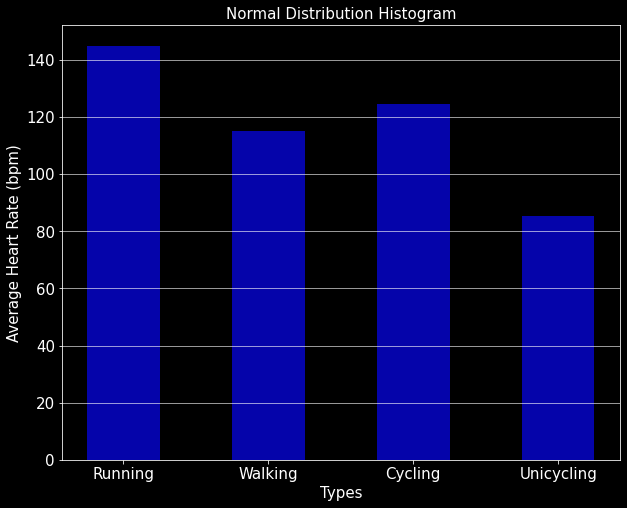

In [ ]:
plt.figure(figsize=[10,8])

plt.bar(hist, bin_edges, width = 0.5, color='#0504aa',alpha=1)
#plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Types',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Average Heart Rate (bpm)',fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

## **TASK-09**
With all this data cleaning, analysis, and visualization, let's create detailed summary tables of my training. To do this, we'll create two tables. The first table will be a summary of the distance (km) and climb (m) variables for each training activity. The second table will list the summary statistics for the average speed (km/hr), climb (m), and distance (km) variables for each training activity.



In [ ]:
# Concatenating three DataFrames

# Calculating total distance and climb in each type of activities



# Calculating summary statistics for each type of activities 

# Combine totals with summary





In [ ]:
df_act=run_df.append([walk_df,cyc_df])
dis_climb_sum=['Distance (km)', 'Climb (m)']
df_total = df_act.groupby('Type')[dis_climb_sum].sum()
df_total

,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


In [ ]:
speed=['Average Speed (km/h)']
df_summ = df_act.groupby('Type')[dis_climb_sum + speed].describe()
df_summ


Distance (km)                       ... Average Speed (km/h)                
                count       mean       std  ...                  50%      75%    max
Type                                        ...                                     
Cycling          29.0  23.468276  9.451040  ...                19.50  21.4900  24.33
Running         459.0  11.382353  4.937853  ...                10.98  11.5200  20.72
Walking          18.0   1.858333  0.880055  ...                 5.97   6.5125   6.91

[3 rows x 24 columns]

In [ ]:
for m in dis_climb_sum:
    df_summ[m, 'total'] = df_total[m]
df_summ

Distance (km)                       ... Average Speed (km/h) Distance (km) Climb (m)
                count       mean       std  ...                  max         total     total
Type                                        ...                                             
Cycling          29.0  23.468276  9.451040  ...                24.33        680.58      6976
Running         459.0  11.382353  4.937853  ...                20.72       5224.50     57278
Walking          18.0   1.858333  0.880055  ...                 6.91         33.45       349

[3 rows x 26 columns]

## **TASK-10**
To wrap up, let’s pick some fun facts out of the summary tables and solve the last exercise. This data ( running history) represent 6 years, 2 months and 21 days. the person went through 7 shoes FUN FACTS
Average distance: 11.38 km
Longest distance: 38.32 km
Highest climb: 982 m
Total climb: 57,278 m
Total number of km run: 5,224 km
Total runs: 459
Number of running shoes gone through: 7 pairs
The story of Forrest Gump is well known–the man, who for no particular reason decided to go for a "little run." His epic run duration was 3 years, 2 months and 14 days (1169 days).
Average distance: 21.13 km
Total number of km run: 24,700 km
Total runs: 1169
Number of running shoes gone through: ...
Assuming Forest and the person go through running shoes at the same rate, figure out how many pairs of shoes Forrest needed for his run.


In [ ]:
# Count average shoes per lifetime (as km per pair) using our fun facts


# Count number of shoes for Forrest's run distance




In [ ]:
shoe_pair_required=(24700*7)//5224
print('Forrest Gump would need {} pairs of shoes!'.format(shoe_pair_required))

Forrest Gump would need 33 pairs of shoes!
